In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


读取数据进行初步数据分析

train.csv

    msno: user id
    song_id: song id
    source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    source_screen_name: name of the layout a user sees.
    source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
    target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .


In [2]:
train= pd.read_csv('data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7377418 entries, 0 to 7377417
Data columns (total 6 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
dtypes: int64(1), object(5)
memory usage: 337.7+ MB


In [3]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [4]:
train.count()

msno                  7377418
song_id               7377418
source_system_tab     7359047
source_screen_name    6962614
source_type           7355879
target                7377418
dtype: int64

test.csv

    id: row id (will be used for submission)
    msno: user id
    song_id: song id
    source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
    source_screen_name: name of the layout a user sees.
    source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.


In [6]:
test=pd.read_csv("data/test.csv")
print(test.info())
print(test.count())
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 6 columns):
id                    int64
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
dtypes: int64(1), object(5)
memory usage: 117.0+ MB
None
id                    2556790
msno                  2556790
song_id               2556790
source_system_tab     2551694
source_screen_name    2393907
source_type           2549493
dtype: int64


,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


sample_submission.csv

sample submission file in the format that we expect you to submit

    id: same as id in test.csv
    target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .


In [37]:
sample_submission=pd.read_csv("data/sample_submission.csv")
print(sample_submission.info())
print(sample_submission.count())
print(sample_submission["target"].count())
sample_submission["target"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556790 entries, 0 to 2556789
Data columns (total 2 columns):
id        int64
target    float64
dtypes: float64(1), int64(1)
memory usage: 39.0 MB
None
id        2556790
target    2556790
dtype: int64
2556790


0.5    2556790
Name: target, dtype: int64

songs.csv

The songs. Note that data is in unicode.

    song_id
    song_length: in ms
    genre_ids: genre category. Some songs have multiple genres and they are separated by |
    artist_name,可以认为是歌曲的标签
    composer
    lyricist
    language


In [3]:
songs = pd.read_csv("data/songs.csv")
print(songs.info())
print(songs.count())
songs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
song_id        object
song_length    int64
genre_ids      object
artist_name    object
composer       object
lyricist       object
language       float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB
None
song_id        2296320
song_length    2296320
genre_ids      2202204
artist_name    2296320
composer       1224972
lyricist        351077
language       2296319
dtype: int64


,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


members.csv

user information.

    msno
    city
    bd: age. Note: this column has outlier values, please use your judgement.
    gender
    registered_via: registration method
    registration_init_time: format %Y%m%d
    expiration_date: format %Y%m%d


In [4]:
members = pd.read_csv("data/members.csv")
print(members.info())
print(members.count())
members.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB
None
msno                      34403
city                      34403
bd                        34403
gender                    14501
registered_via            34403
registration_init_time    34403
expiration_date           34403
dtype: int64


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


song_extra_info.csv

    song_id
    song name - the name of the song.
    isrc - International Standard Recording Code, theoretically can be used as an identity of a song. However, what worth to note is, ISRCs generated from providers have not been officially verified; therefore the information in ISRC, such as country code and reference year, can be misleading/incorrect. Multiple songs could share one ISRC since a single recording could be re-published several times.


In [5]:
song_extra=pd.read_csv("data/song_extra_info.csv")
print(song_extra.info())
print(song_extra.count())
song_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
song_id    object
name       object
isrc       object
dtypes: object(3)
memory usage: 52.6+ MB
None
song_id    2295971
name       2295969
isrc       2159423
dtype: int64


,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
train=train.merge(songs,how="left",on="song_id")

In [7]:
train=train.merge(song_extra,how="left",on="song_id")
train.head()

MemoryError: 

In [8]:
import seaborn as sn

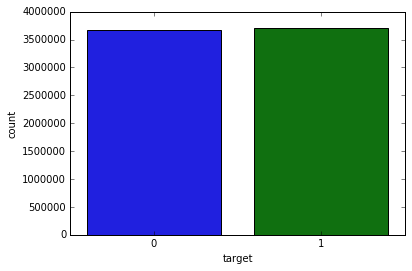

In [9]:
sn.countplot(train['target'])

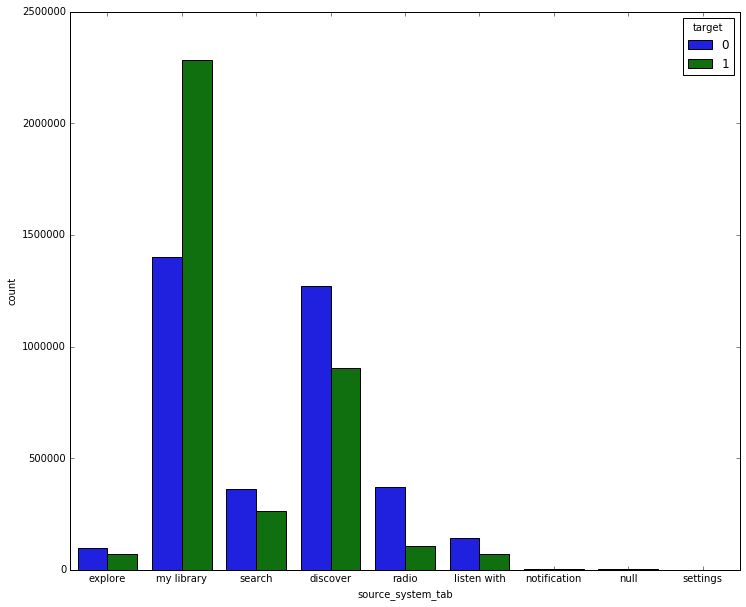

In [10]:
plt.figure(figsize=(12,10))
# 画出 source_system_tab 这个属性对target的贡献图
sn.countplot(train['source_system_tab'],hue=train['target'])

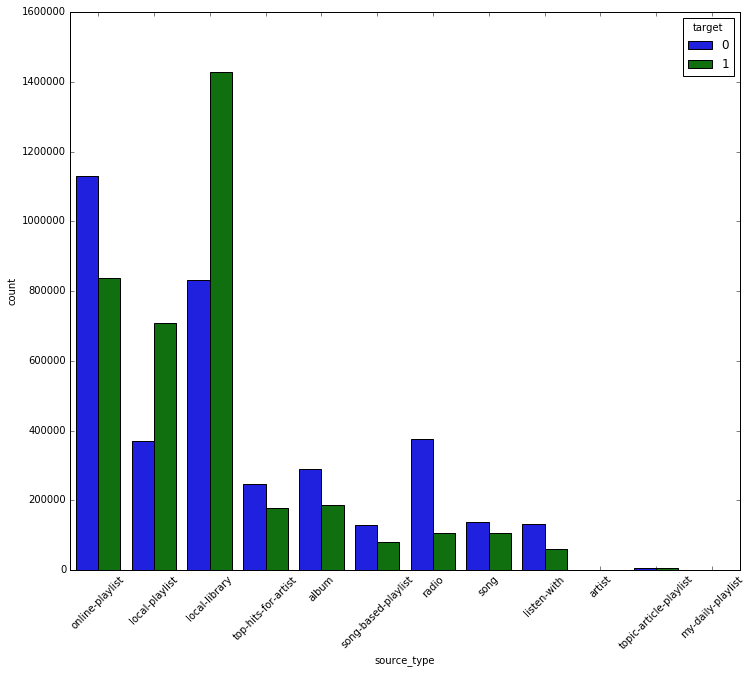

In [23]:
plt.figure(figsize=(12,10))
g = sn.countplot(train['source_type'],hue=train['target'])
locs, labels = plt.xticks()
g.set_xticklabels(labels,rotation=45)

In [8]:
# 删除里面为空的数据
train.dropna(subset=["source_system_tab"],inplace=True)
train.count()

msno                  7359047
song_id               7359047
source_system_tab     7359047
source_screen_name    6962447
source_type           7355712
target                7359047
song_length           7358933
genre_ids             7240826
artist_name           7358933
composer              5687120
lyricist              4187372
language              7358897
name                  7357595
isrc                  6782527
dtype: int64

Not considering the rows where source_system_tab is settings or notifications since those counts negligible and too small

- dataframe 删除数据 sql语句:  null 的数据也要不要删除

In [9]:
train = train.query("source_system_tab!='settings'")
train= train.query("source_system_tab!='notifications'")
train[train["source_system_tab"]=='settings'].count()
train[train["source_system_tab"]=='notifications'].count()
# sn.countplot(train['source_system_tab'],hue=train["target"])

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
song_length           0
genre_ids             0
artist_name           0
composer              0
lyricist              0
language              0
name                  0
isrc                  0
dtype: int64

In [10]:
train=train.query("source_type != 'artist'")
train=train.query("source_type !='topic-article-playlist'")
train=train.query("source_type!='my-daily-playlist'")
train.count()

msno                  7341952
song_id               7341952
source_system_tab     7341952
source_screen_name    6948622
source_type           7338617
target                7341952
song_length           7341838
genre_ids             7224015
artist_name           7341838
composer              5673737
lyricist              4177802
language              7341802
name                  7340505
isrc                  6766770
dtype: int64

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7341952 entries, 0 to 7377417
Data columns (total 14 columns):
msno                  object
song_id               object
source_system_tab     object
source_screen_name    object
source_type           object
target                int64
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
isrc                  object
dtypes: float64(2), int64(1), object(11)
memory usage: 840.2+ MB


In [12]:
train["source_system_tab"]=train['source_system_tab'].astype("category")
train['source_type'] = train['source_type'].astype("category")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7341952 entries, 0 to 7377417
Data columns (total 14 columns):
msno                  object
song_id               object
source_system_tab     category
source_screen_name    object
source_type           category
target                int64
song_length           float64
genre_ids             object
artist_name           object
composer              object
lyricist              object
language              float64
name                  object
isrc                  object
dtypes: category(2), float64(2), int64(1), object(9)
memory usage: 742.2+ MB


In [18]:
train['language'].value_counts()
# 可以考虑用3.0 填充缺失值

 3.0     4025839
 52.0    1856304
 31.0     652252
-1.0      307584
 17.0     243959
 10.0     170898
 24.0      78182
 59.0       4189
 45.0       2386
 38.0        209
Name: language, dtype: int64

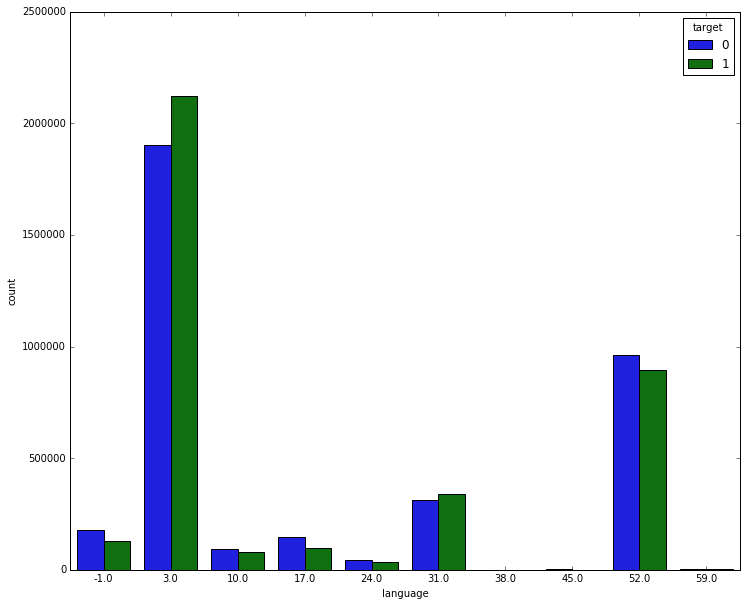

In [19]:
plt.figure(figsize=(12,10))
sn.countplot(train['language'],hue=train['target'])

尽管3.0的语言很多，但是给0和1 的贡献差不多

贡献度最大的应该是 3.0， 31.0， 52.0

In [13]:
members= pd.read_csv("data/members.csv")
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
msno                      34403 non-null object
city                      34403 non-null int64
bd                        34403 non-null int64
gender                    14501 non-null object
registered_via            34403 non-null int64
registration_init_time    34403 non-null int64
expiration_date           34403 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [14]:
train=train.merge(members,how="left",on="msno")
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


(-10, 60)

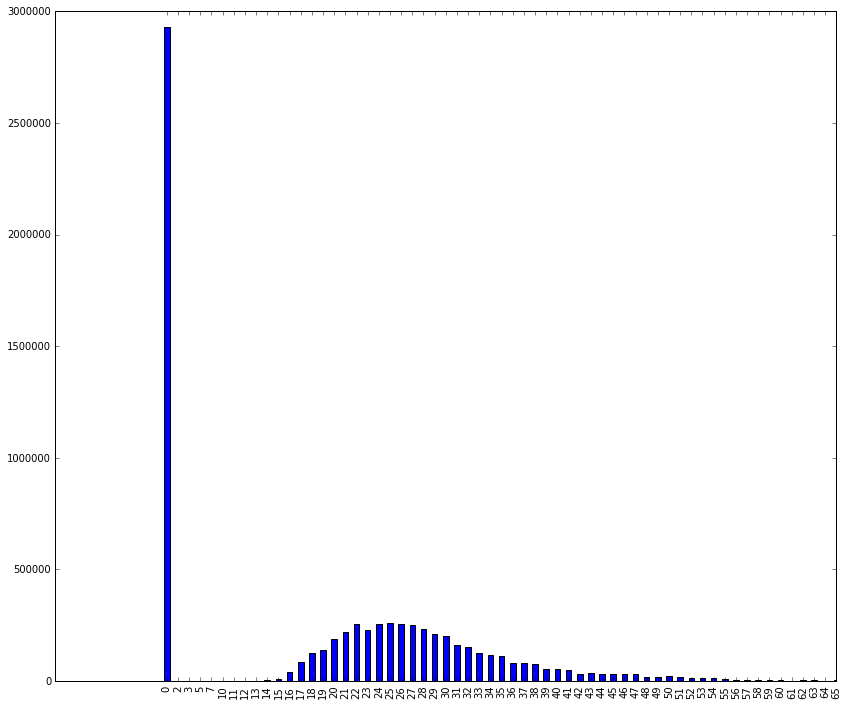

In [23]:
plt.figure(figsize=(14,12))
train['bd'].value_counts(sort=False).plot.bar()

plt.xlim([-10,60])

In [24]:
train['bd'].value_counts()

 0       2928810
 25       260885
 24       257489
 26       256805
 22       254009
 27       251213
 28       231773
 23       226841
 21       220697
 29       209797
 30       202523
 20       188513
 31       160963
 32       150702
 19       140244
 33       126944
 18       124388
 34       114825
 35       111968
 17        86409
 36        82272
 37        79263
 38        75023
 40        54052
 39        52330
 41        51191
 16        41811
 43        35185
 44        33281
 45        31734
          ...   
 3           493
 82          447
 5           392
 73          376
 10          361
 13          344
 2           323
 68          311
 11          290
 931         247
 12          222
 95          203
 87          154
 144         152
 131         146
-43          142
 107          94
 112          90
-38           53
 102          46
 83           40
 70           33
 106          23
 90           15
 85           12
 89           11
 93           10
 78           

In [25]:
train = train.query("bd >= 0")

In [15]:
train_temp = train.query("bd >=5 and bd <80")

In [16]:
train_temp.to_csv("train_member_song.csv",index=False)

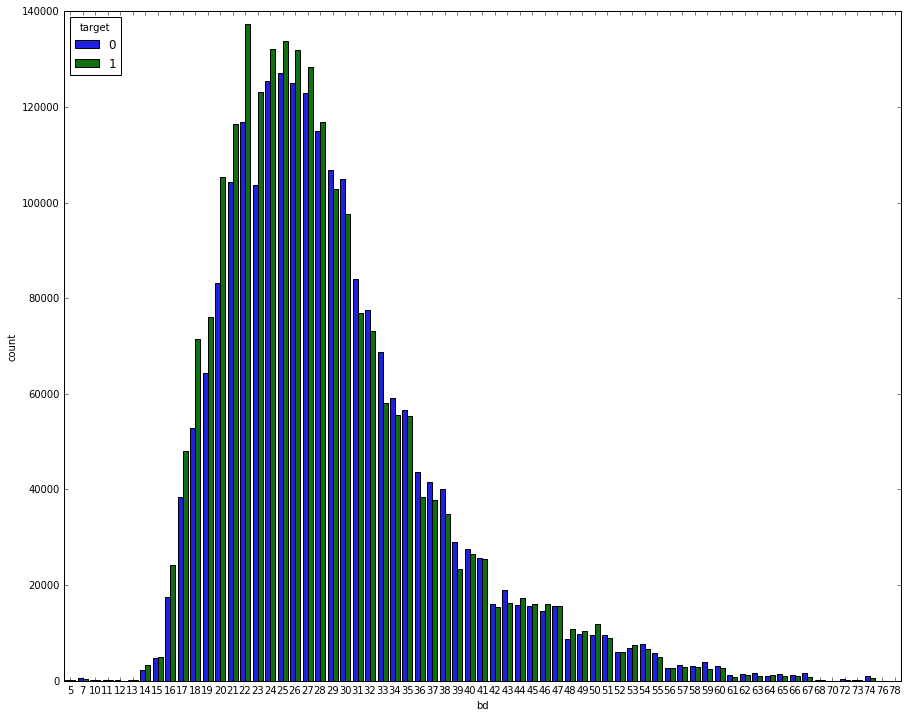

In [27]:
plt.figure(figsize=(15,12))
sn.countplot(train_temp['bd'],hue=train_temp['target'])

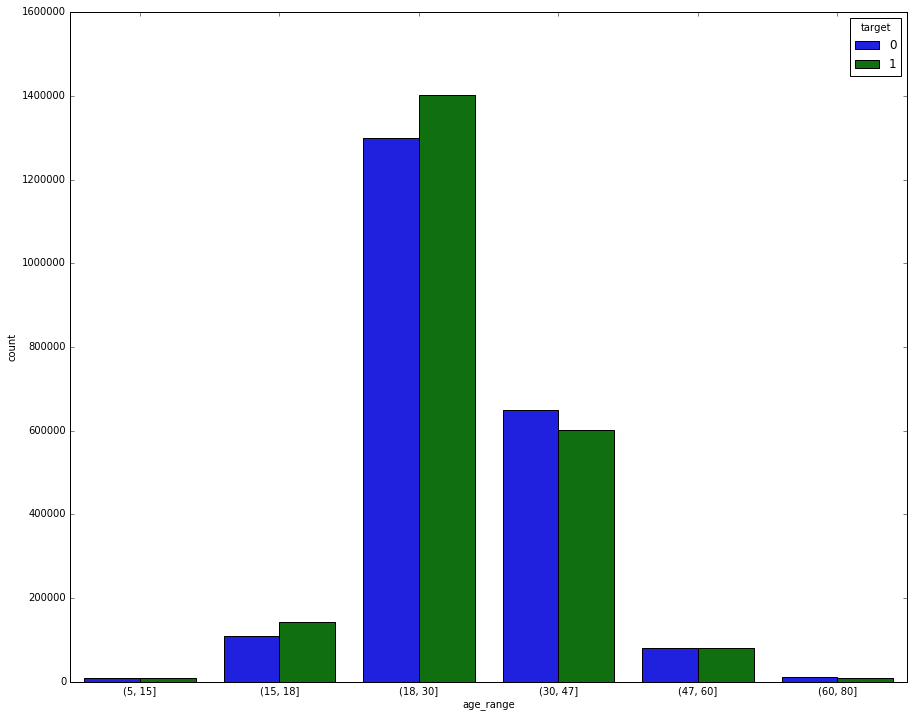

In [29]:
train_temp['age_range'] = pd.cut(train_temp['bd'],bins=[5,15,18,30,47,60,80])
plt.figure(figsize=(15,12))
sn.countplot(train_temp['age_range'],hue=train_temp['target'])

In [30]:
train_temp['genre_ids'].value_counts().head()

465     2250803
458      757346
921      199797
1609     191906
444      137822
Name: genre_ids, dtype: int64

In [32]:
train_temp.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date,age_range
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911,"(18, 30]"
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911,"(18, 30]"
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911,"(18, 30]"
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1,229982.0,465,BIGBANG TAEYANG,TEDDY| DEE.P| Rebecca Johnson,...,31.0,眼| 鼻| 口 (Eyes| Nose| Lips),TWA531400512,13,24,female,9,20110525,20170911,"(18, 30]"
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1,278964.0,2022,OneRepublic,Ryan Tedder,...,52.0,Dreaming Out Loud,USUM70759544,15,26,male,9,20111107,20180304,"(18, 30]"


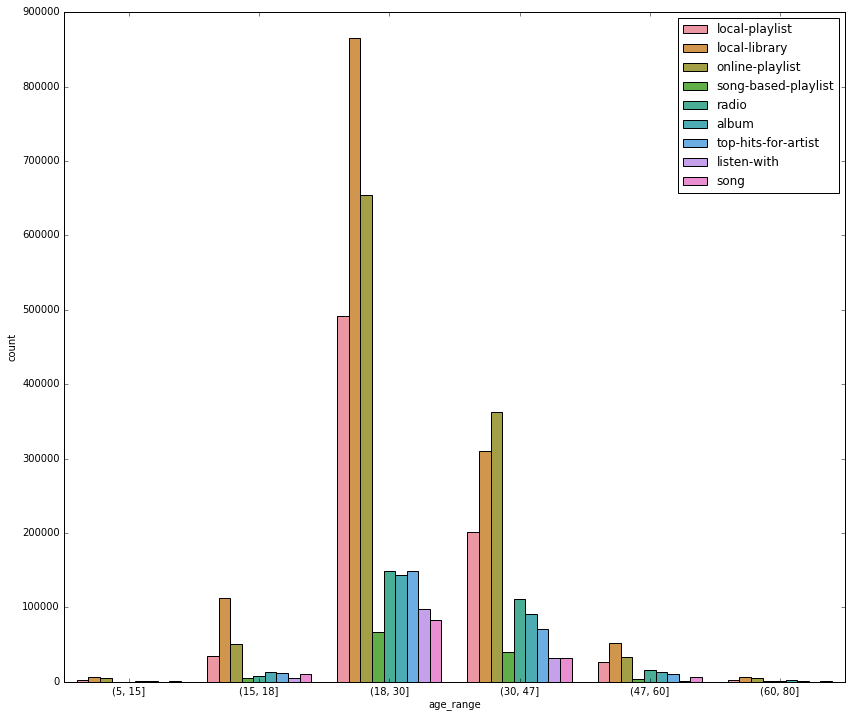

In [33]:
plt.figure(figsize=(14,12))
sn.countplot(train_temp['age_range'],hue=train_temp["source_type"])
plt.legend(loc="upper right")

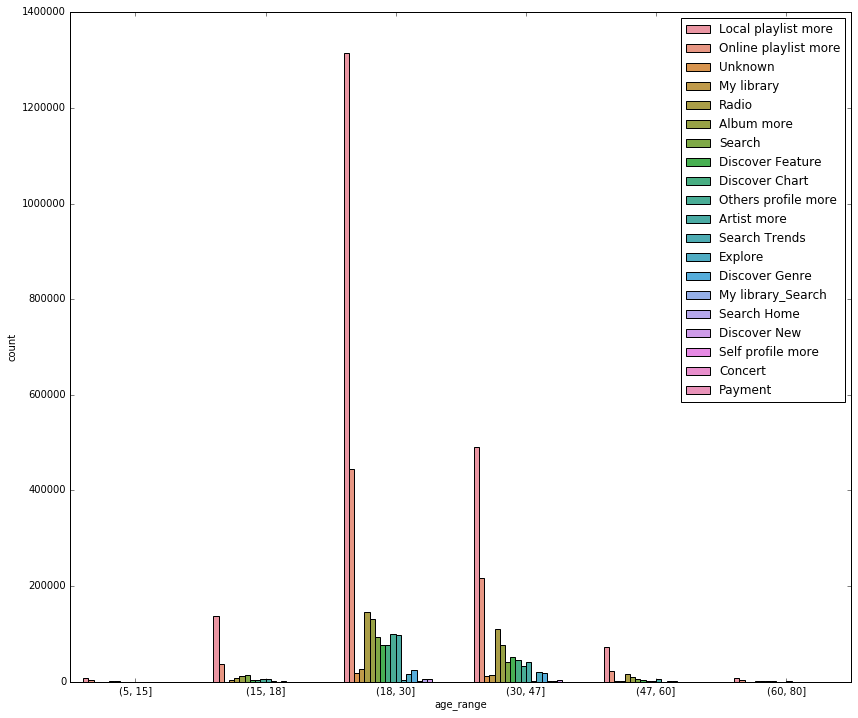

In [34]:
plt.figure(figsize=(14,12))
sn.countplot(train_temp['age_range'],hue=train_temp["source_screen_name"])
plt.legend(loc="upper right")

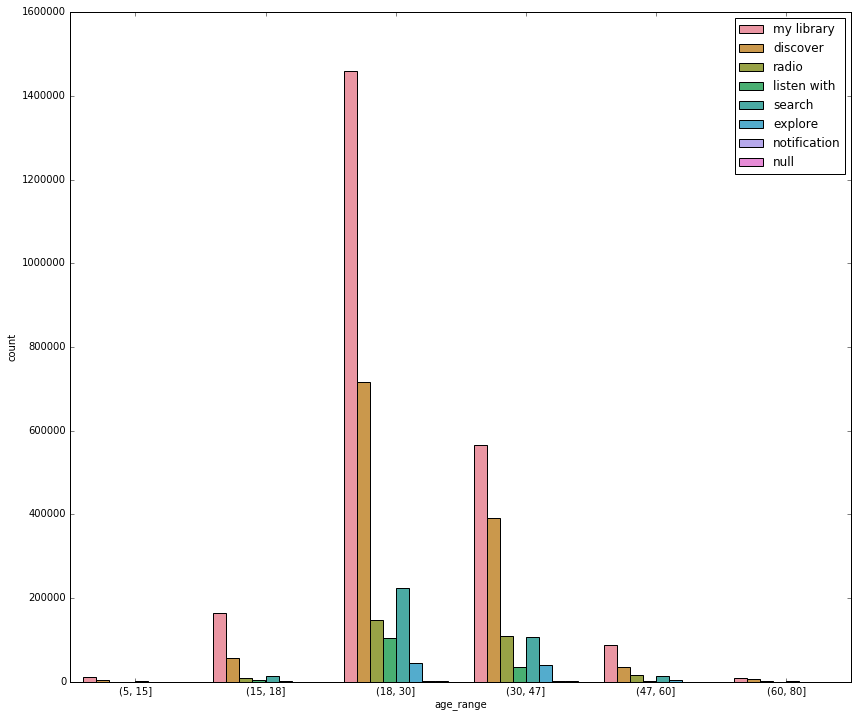

In [35]:
plt.figure(figsize=(14,12))
sn.countplot(train_temp['age_range'],hue=train_temp["source_system_tab"])
plt.legend(loc="upper right")

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7341757 entries, 0 to 7341951
Data columns (total 20 columns):
msno                      object
song_id                   object
source_system_tab         object
source_screen_name        object
source_type               object
target                    int64
song_length               float64
genre_ids                 object
artist_name               object
composer                  object
lyricist                  object
language                  float64
name                      object
isrc                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
expiration_date           int64
dtypes: float64(2), int64(6), object(12)
memory usage: 1.1+ GB
